In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from sklearn import metrics
from keras import regularizers
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from keras.models import model_from_json
# fix random seed for reproducibility
np.random.seed(7)

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=110, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kern

Train on 690 samples, validate on 18108 samples
Epoch 1/150
690/690 [==============================] - 1s - loss: 7.1796 - acc: 0.5072 - val_loss: 6.5599 - val_acc: 0.6280
Epoch 2/150
690/690 [==============================] - 0s - loss: 6.2331 - acc: 0.5029 - val_loss: 5.6325 - val_acc: 0.5000
Epoch 3/150
690/690 [==============================] - 0s - loss: 5.3083 - acc: 0.5275 - val_loss: 4.7743 - val_acc: 0.5000
Epoch 4/150
690/690 [==============================] - 0s - loss: 4.4760 - acc: 0.5333 - val_loss: 4.0091 - val_acc: 0.5000
Epoch 5/150
690/690 [==============================] - 0s - loss: 3.7489 - acc: 0.5275 - val_loss: 3.3501 - val_acc: 0.5097
Epoch 6/150
690/690 [==============================] - 0s - loss: 3.1323 - acc: 0.5362 - val_loss: 2.8003 - val_acc: 0.5172
Epoch 7/150
690/690 [==============================] - 0s - loss: 2.6197 - acc: 0.5435 - val_loss: 2.3520 - val_acc: 0.5576
Epoch 8/150
690/690 [==============================] - 0s - loss: 2.2090 - acc: 0.56

690/690 [==============================] - 0s - loss: 0.2777 - acc: 0.9638 - val_loss: 0.5608 - val_acc: 0.8923
Epoch 67/150
690/690 [==============================] - 0s - loss: 0.2949 - acc: 0.9623 - val_loss: 0.4666 - val_acc: 0.9143
Epoch 68/150
690/690 [==============================] - 0s - loss: 0.3060 - acc: 0.9522 - val_loss: 0.5286 - val_acc: 0.8977
Epoch 69/150
690/690 [==============================] - 0s - loss: 0.3308 - acc: 0.9406 - val_loss: 0.3900 - val_acc: 0.9211
Epoch 70/150
690/690 [==============================] - 0s - loss: 0.3136 - acc: 0.9478 - val_loss: 0.4136 - val_acc: 0.9180
Epoch 71/150
690/690 [==============================] - 0s - loss: 0.3242 - acc: 0.9464 - val_loss: 0.4953 - val_acc: 0.9000
Epoch 72/150
690/690 [==============================] - 0s - loss: 0.3182 - acc: 0.9478 - val_loss: 0.3820 - val_acc: 0.9213
Epoch 73/150
690/690 [==============================] - 0s - loss: 0.3150 - acc: 0.9478 - val_loss: 0.4147 - val_acc: 0.9146
Epoch 74/150


690/690 [==============================] - 0s - loss: 0.3042 - acc: 0.9536 - val_loss: 0.4430 - val_acc: 0.9139
Epoch 132/150
690/690 [==============================] - 0s - loss: 0.2934 - acc: 0.9565 - val_loss: 0.5966 - val_acc: 0.8910
Epoch 133/150
690/690 [==============================] - 0s - loss: 0.3250 - acc: 0.9478 - val_loss: 0.4970 - val_acc: 0.8982
Epoch 134/150
690/690 [==============================] - 0s - loss: 0.2984 - acc: 0.9464 - val_loss: 0.4080 - val_acc: 0.9113
Epoch 135/150
690/690 [==============================] - 0s - loss: 0.2866 - acc: 0.9536 - val_loss: 0.3800 - val_acc: 0.9195
Epoch 136/150
690/690 [==============================] - 0s - loss: 0.2945 - acc: 0.9536 - val_loss: 0.5559 - val_acc: 0.8903
Epoch 137/150
690/690 [==============================] - 0s - loss: 0.3843 - acc: 0.9232 - val_loss: 0.4523 - val_acc: 0.9025
Epoch 138/150
690/690 [==============================] - 0s - loss: 0.2775 - acc: 0.9652 - val_loss: 0.6138 - val_acc: 0.8677
Epoch 

/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


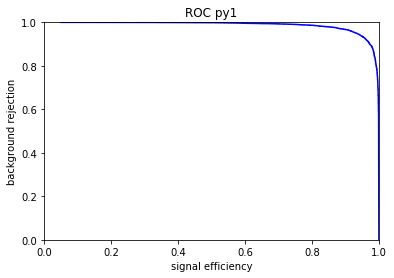

Saved model to disk


In [17]:
dataset = np.loadtxt("train.txt", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:110]
Y = dataset[:,110]

dataset_test = np.loadtxt("test.txt", delimiter=",")
# split into input (X) and output (Y) variables
X_test = dataset_test[:,0:110]
Y_test = dataset_test[:,110]

l2val=0.018
model=Sequential();
model.add(Dense(256, input_dim=110, init='uniform', activation='relu',kernel_regularizer=regularizers.l2(l2val)))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu',init='uniform',kernel_regularizer=regularizers.l2(l2val)))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu',init='uniform',kernel_regularizer=regularizers.l2(l2val)))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu',init='uniform',kernel_regularizer=regularizers.l2(l2val)))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu',init='uniform',kernel_regularizer=regularizers.l2(l2val)))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu',init='uniform',kernel_regularizer=regularizers.l2(l2val)))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu',init='uniform',kernel_regularizer=regularizers.l2(l2val)))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu',init='uniform',kernel_regularizer=regularizers.l2(l2val)))
model.add(Dropout(0.6))

#model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.001, decay=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y,validation_data=(X_test,Y_test), epochs=150, batch_size=128)

scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


probs = model.predict_proba(X_test)
#np.savetxt('testout.txt',probs,delimiter=',')
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC py1')
plt.plot(tpr, 1-fpr, 'b')
#plt.plot(tpr, fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('signal efficiency')
plt.ylabel('background rejection')
plt.show()




model_json = model.to_json()
with open("model_test.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_test.h5")
print("Saved model to disk")
